<a href="https://colab.research.google.com/github/VISHAL2077/Generative_AI_2025/blob/main/2303a52077_assignment8_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

url = 'https://drive.google.com/uc?id=1uutPAkOSYb2Uror1mk2dZUtoYbCgz6DO'
df = pd.read_csv(url)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df.iloc[:, -1])
num_classes = len(np.unique(y))
y = to_categorical(y, num_classes)
X = df.iloc[:, :-1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
unique, counts = np.unique(np.argmax(y_train, axis=1), return_counts=True)
print("Class distribution:", dict(zip(unique, counts)))
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = keras.Sequential([
    keras.layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(40, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=200, batch_size=64, validation_data=(X_test, y_test))

Class distribution: {np.int64(0): np.int64(9), np.int64(1): np.int64(43), np.int64(2): np.int64(551), np.int64(3): np.int64(506), np.int64(4): np.int64(157), np.int64(5): np.int64(13)}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 69ms/step - accuracy: 0.4483 - loss: 1.6531 - val_accuracy: 0.4563 - val_loss: 1.4163
Epoch 2/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.5329 - loss: 1.3489 - val_accuracy: 0.5562 - val_loss: 1.1836
Epoch 3/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.5800 - loss: 1.1176 - val_accuracy: 0.5500 - val_loss: 1.0908
Epoch 4/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5807 - loss: 1.0370 - val_accuracy: 0.5594 - val_loss: 1.0508
Epoch 5/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6029 - loss: 0.9885 - val_accuracy: 0.5531 - val_loss: 1.0219
Epoch 6/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.6002 - loss: 0.9994 - val_accuracy: 0.5688 - val_loss: 1.0087
Epoch 7/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.6342 - loss: 0.9153 - val_accuracy: 0.5469 - val_loss: 0.9908
Epoch 8/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6265 - loss: 0.9416 - val_accuracy: 0.

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step 


Test Accuracy: 0.6156
Precision: 0.6115
Recall: 0.6156
F1-score: 0.6118
Confusion Matrix:
 [[ 0  0  1  0  0  0]
 [ 1  1  6  2  0  0]
 [ 1  1 94 30  4  0]
 [ 0  3 26 79 24  0]
 [ 0  0  3 15 23  1]
 [ 0  0  0  1  4  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.20      0.10      0.13        10
           2       0.72      0.72      0.72       130
           3       0.62      0.60      0.61       132
           4       0.42      0.55      0.47        42
           5       0.00      0.00      0.00         5

    accuracy                           0.62       320
   macro avg       0.33      0.33      0.32       320
weighted avg       0.61      0.62      0.61       320



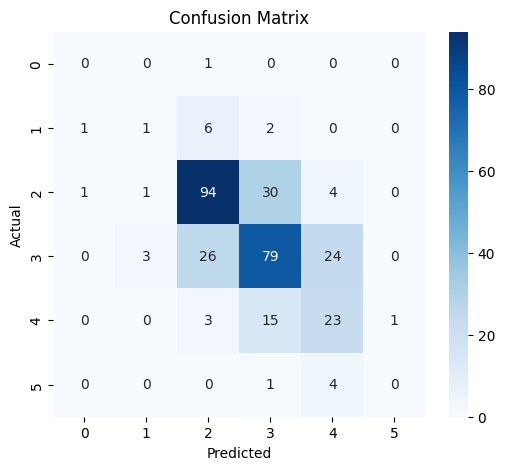

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
Prediction: Good Quality


In [ ]:
# Evaluate model
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)
y_test_labels = np.argmax(y_test, axis=1)
accuracy = accuracy_score(y_test_labels, y_pred)
precision = precision_score(y_test_labels, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test_labels, y_pred, average='weighted', zero_division=1)
f1 = f1_score(y_test_labels, y_pred, average='weighted', zero_division=1)
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Save the model
model.save("wine_quality_model.h5")

# Generate confusion matrix and classification report
conf_matrix = confusion_matrix(y_test_labels, y_pred)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_report(y_test_labels, y_pred))

# Plot confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

def predict_quality(features):
    loaded_model = keras.models.load_model("wine_quality_model.h5")
    features = scaler.transform([features])  # Standardize input
    prediction = loaded_model.predict(features)
    predicted_class = np.argmax(prediction)
    quality_label = label_encoder.inverse_transform([predicted_class])[0]
    return "Good Quality" if quality_label >= 6 else "Bad Quality"
sample_features = X_test[0]
print("Prediction:", predict_quality(sample_features))